# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Bayesian networks: tabu algorithm</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Genetic predictors](#3)
    * [Target variables](#4)
* [Construction of the Bayesian network using the tabu algorithm](#2)

In this notebook we will build a Bayesian network with the genetic variables as predictors and with the variable W1.2MedDifWRelFFM1 as the target variable (it was the variable with the best accuracy in Random Forest and probably the one that best summarizes the information of the performance in physical exercise).

## Loading data <a class="anchor" id="1"></a>

* [Returning to the index of contents](#index)

### Genetic predictors <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In [2]:
handle_genetic <- read.csv('handle_genetic_fusion_28_04_20.csv')
head(handle_genetic)

rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,rs10497520,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,C:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,C:C,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,C:C,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,C:C,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,C:C,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


### Target variables <a class="anchor" id="4"></a>

* [Returning to the index of contents](#index)

In [3]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [4]:
ind_med <- cbind(handle_target['W1.2MedDifWRelFFM1'],handle_genetic)

rownames(ind_med) <- NULL

head(ind_med)

W1.2MedDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
-0.46612522,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
-0.01996573,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0.36494556,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0.36161104,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
-0.26597295,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0.20463161,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [5]:
W1.2MedDifWRelFFM1Bin <- factor(as.numeric(handle_target['W1.2MedDifWRelFFM1']>=median(handle_target$W1.2MedDifWRelFFM1)))

ind_med <- cbind(W1.2MedDifWRelFFM1Bin, ind_med)

head(ind_med)

W1.2MedDifWRelFFM1Bin,W1.2MedDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,-0.46612522,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,-0.01996573,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,0.36494556,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,0.36161104,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,-0.26597295,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,0.20463161,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


In [6]:
ind_med$W1.2MedDifWRelFFM1 <- NULL
head(ind_med)
dim(ind_med)

W1.2MedDifWRelFFM1Bin,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,G:G,C:T,A:T,T:T,A:A,C:G,G:G,C:G,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,A:G,A:A,A:G,A:A
0,G:G,C:T,A:T,C:T,A:G,G:G,G:G,G:G,A:A,...,C:T,A:G,A:G,A:G,C:T,A:G,G:G,A:G,A:G,T:T
0,G:G,T:T,A:T,T:T,A:G,G:G,G:G,C:G,A:A,...,C:T,A:G,G:G,A:G,C:T,A:A,G:G,A:G,A:G,A:A
0,G:G,T:T,T:T,C:T,A:G,G:G,G:G,C:C,A:T,...,C:T,A:G,G:G,A:G,C:T,A:G,G:G,A:A,A:A,A:A
0,G:G,C:T,T:T,C:T,G:G,C:C,G:G,C:G,T:T,...,C:T,A:G,G:G,G:G,T:T,G:G,G:G,A:A,A:G,A:T
0,G:G,C:T,T:T,C:T,A:G,G:G,G:G,C:G,A:T,...,C:T,A:G,G:G,G:G,C:T,A:G,G:G,A:G,G:G,T:T


[1]  82 179

As we do not have the graph given by the expert, we are going to base ourselves on probability to determine the significant relationships with the target variable. 

## Construction of the Bayesian network using the tabu algorithm<a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

In [7]:
library(bnlearn)

Warning message:
"package 'bnlearn' was built under R version 3.6.2"
Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



In [10]:
set.seed(10)
tabu <- tabu(ind_med, tabu = 500,iss = 10, score = 'bde')

Loading required namespace: Rgraphviz


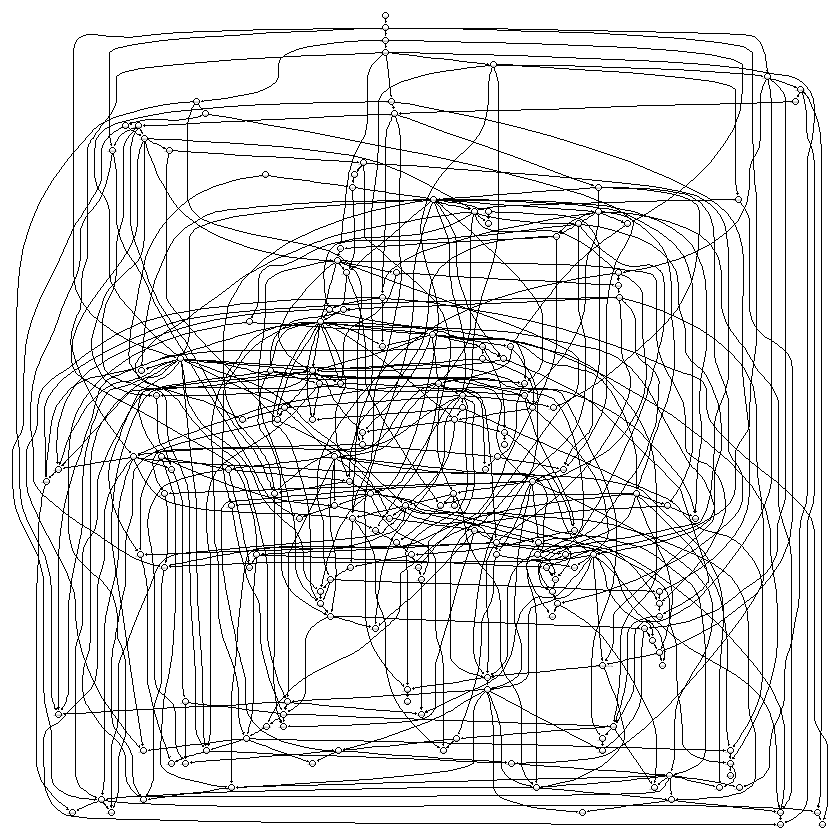

In [12]:
graphviz.plot(tabu)

In [20]:
bnlearn::score(tabu, data = ind_med,type = 'bde')

[1] -11659.74

Comparison with the randomized model:

In [21]:
set.seed(1)
rnd <- random.graph(nodes = names(ind_med))
modelstring(rnd)

bnlearn::score(rnd, data = ind_med,type = 'bde')

[1] "[W1.2MedDifWRelFFM1Bin][rs10034661][rs10063949][rs1024610][rs1024611][rs1042713][rs1045485][rs10491003][rs1049305][rs1049434][rs10497520][rs1052700][rs1057972][rs10741657][rs10921078][rs10999516][rs11096663][rs11144134][rs11254363][rs1137100][rs1205][rs12150660][rs12255372][rs1260326][rs12613181][rs1420100][rs1420106][rs1481012][rs15705][rs1572312][rs16924573][rs17685][rs17782313][rs1799722][rs1799865][rs1799907][rs1800012][rs1800169][rs1800206][rs1800629][rs1800795][rs1800796][rs1800872][rs1805086][rs1815739][rs182549][rs1906058][rs1956197][rs2016520][rs222158][rs2395182][rs2470893][rs2472297][rs2515941][rs26802][rs2722171][rs28497577][rs3213221][rs3219177][rs331079][rs34124816][rs3925584][rs4073918][rs4410790][rs4654748][rs4880][rs492602][rs4997][rs516115][rs61752479][rs6265][rs660339][rs696217][rs7498665][rs768539][rs9902453][rs1107946|rs1042713][rs11225395|rs1024611][rs1137101|rs11096663][rs1144393|rs10921078][rs11549465|rs1042713:rs1052700][rs11715829|rs1024610:rs1045485:rs11144134][rs13146355|rs10741657:rs11144134][rs1330363|rs1052700][rs13946|rs1137100][rs1516797|rs1049434][rs1676486|rs12613181][rs1800497|rs10063949][rs1800562|rs1052700:rs1799722][rs1801282|rs1045485][rs1862513|rs1049434:rs1057972][rs198851|rs17782313][rs2040410|rs1800795][rs2071856|rs1137100][rs2104772|rs11144134][rs2228059|rs12150660][rs2276109|rs1042713:rs1800012][rs2296135|rs1052700][rs2304795|rs1800169][rs2542729|rs10491003:rs15705:rs1800872][rs2593324|rs1800872][rs35767|rs10741657:rs1800206:rs1906058][rs3752135|rs2722171:rs34124816][rs3768816|rs1956197][rs3811647|rs10063949][rs405509|rs1420100][rs4588|rs182549][rs4675639|rs17782313:rs2515941][rs4789932|rs1481012][rs4919510|rs11254363:rs1799907][rs558129|rs1052700:rs1799907][rs602662|rs1799722:rs1800169:rs222158][rs6133175|rs10063949:rs222158][rs6548238|rs1799722][rs6735530|rs1260326][rs7144481|rs1049434:rs4410790][rs7292407|rs1572312:rs34124816][rs731236|rs1049305][rs7843014|rs11096663:rs16924573:rs3925584][rs7903146|rs1800872][rs7965584|rs11254363:rs696217][rs833070|rs4997][rs921943|rs1956197][rs9469199|rs10491003:rs28497577][rs12934922|rs11225395][rs143383|rs13946][rs1451462|rs11715829][rs1589241|rs1049305:rs13146355][rs1799983|rs1144393][rs1801131|rs1144393][rs1801133|rs10491003:rs1057972:rs1676486][rs1801198|rs11549465][rs1801260|rs1800497][rs2010963|rs1572312:rs1676486][rs211302|rs11225395:rs1799722][rs2241057|rs1799722:rs1862513][rs2253206|rs13946][rs28357094|rs2542729][rs2943641|rs198851][rs3753841|rs1516797:rs2016520:rs2071856][rs4072037|rs2104772][rs4680|rs1107946:rs2395182][rs5186|rs1862513:rs2395182][rs5418|rs1516797][rs646776|rs11715829:rs1330363:rs16924573][rs6552828|rs1800169:rs2304795][rs6570913|rs10497520:rs13946][rs679620|rs1042713:rs2276109][rs716745|rs1800497][rs7454108|rs405509][rs7566605|rs13146355:rs558129][rs8111989|rs1801282][rs8192678|rs3768816][rs884736|rs2040410][rs9939609|rs1052700:rs1572312:rs1805086:rs2016520:rs2593324:rs4675639][rs1800255|rs11254363:rs12934922][rs2070744|rs1801131][rs2368564|rs143383:rs2228059][rs3219178|rs143383:rs1800206][rs33972313|rs1801260][rs3918358|rs1589241:rs1800169][rs4253778|rs2040410:rs4072037][rs4343|rs1801260:rs2296135][rs650108|rs11144134:rs211302][rs659366|rs143383:rs222158:rs35767:rs4997][rs6968554|rs1137101:rs1801198][rs7191721|rs143383][rs7800944|rs11144134:rs1800562:rs2104772:rs4072037][rs824205|rs1107946:rs1260326:rs405509:rs696217:rs7498665:rs8192678][rs970547|rs1801198:rs222158][rs526934|rs1205:rs4343][rs6053005|rs1137101:rs4343][rs7426114|rs1137101:rs12255372:rs1801198:rs3918358][rs7501331|rs2368564][rs7682|rs10063949:rs1956197:rs3219178][rs7775228|rs1420106:rs2070744:rs7566605][rs8065080|rs1451462:rs2070744:rs3219178:rs3753841:rs5418][rs699|rs17782313:rs2304795:rs4880:rs4919510:rs526934:rs61752479][rs7732671|rs6053005]"

[1] -15039.98

The score obtained is extremely low, although higher than in the case of the random model. Let's keep the most significant relationships according to the independence test of $\chi^2$.

Significance relations obtained with the tabu algorithm:

In [22]:
sig_tabu <- arc.strength(tabu, data = ind_med, criterion = "x2") 
head(sig_tabu)

from,to,strength
rs1799865,rs3918358,3.312751e-20
rs4410790,rs6968554,1.785994e-18
rs492602,rs602662,1.695393e-16
rs659366,rs660339,7.434565e-16
rs2228059,rs2296135,2.959759e-09
rs1799865,rs768539,1.000000e+00


To select the significant relationships, we assume that we are interested in those that contain the target variable: W1.2MedDifWRelFFM1. Let's select with this condition.

In [23]:
sig_tabu[sig_tabu$from  == 'W1.2MedDifWRelFFM1Bin',]

,from,to,strength
178,W1.2MedDifWRelFFM1Bin,rs11144134,0.9989072
272,W1.2MedDifWRelFFM1Bin,rs7191721,0.9877784


In [24]:
sig_tabu[sig_tabu$to  == 'W1.2MedDifWRelFFM1Bin',]

,from,to,strength
77,rs6968554,W1.2MedDifWRelFFM1Bin,0.0637851
334,rs1800497,W1.2MedDifWRelFFM1Bin,0.5435754
335,rs1572312,W1.2MedDifWRelFFM1Bin,0.6633979


The relationships given between the genetic predictors and the target variable are not significant, but it may be that in the presence of the physical variables these relationships make more sense. That is why we collect these predictors to be analyzed later along with the physical predictors.

In [18]:
snp_tabu <- c(sig_tabu[sig_tabu$from  == 'W1.2MedDifWRelFFM1Bin',]$to, sig_tabu[sig_tabu$to  == 'W1.2MedDifWRelFFM1Bin',]$from)

In [19]:
snp_tabu

[1] "rs11144134" "rs7191721"  "rs6968554"  "rs1800497"  "rs1572312"